In [1]:
import pandas as pd

df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Info dasar
print("🔍 Dimensi dataset:", df.shape)
print("\n📋 Kolom-kolom:\n", df.columns)
print("\n🧠 Tipe data:\n", df.dtypes)
print("\n👀 5 data teratas:\n", df.head())

🔍 Dimensi dataset: (10000, 11)

📋 Kolom-kolom:
 Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

🧠 Tipe data:
 SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

👀 5 data teratas:
       SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   
3  SESSION00004  Undergraduate  Computer Science  2025-05-06   
4  SESSION00005  Undergraduate

In [2]:
# Cek jumlah missing values
print("❓ Missing values per kolom:\n", df.isnull().sum())

# penanganan: di isi dengan median
df_filled = df.fillna(df.median(numeric_only=True))

# Atau drop baris yang memiliki missing value
df_dropped = df.dropna()

❓ Missing values per kolom:
 SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


📈 Statistik deskriptif:
        SessionLengthMin  TotalPrompts  AI_AssistanceLevel  SatisfactionRating
count      10000.000000  10000.000000        10000.000000        10000.000000
mean          19.846467      5.607500            3.479500            3.417780
std           13.897302      4.648764            0.991805            1.143331
min            0.030000      1.000000            1.000000            1.000000
25%            9.630000      2.000000            3.000000            2.600000
50%           16.650000      4.000000            4.000000            3.500000
75%           26.670000      8.000000            4.000000            4.400000
max          110.810000     39.000000            5.000000            5.000000


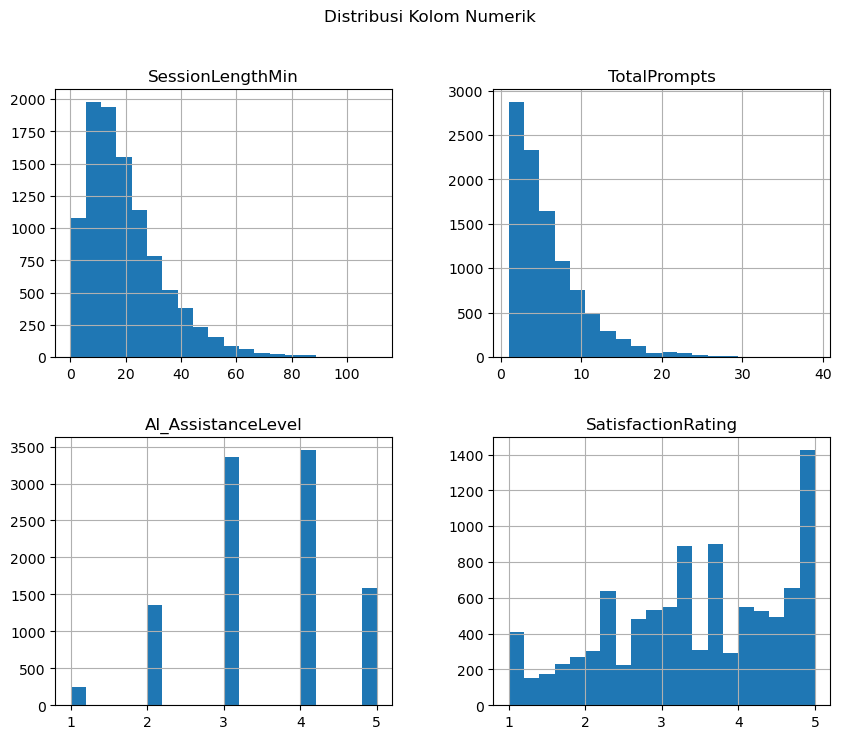

In [3]:
# Statistik deskriptif
print("📈 Statistik deskriptif:\n", df.describe())

# Distribusi kolom numerik
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8), bins=20)
plt.suptitle("Distribusi Kolom Numerik")
plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


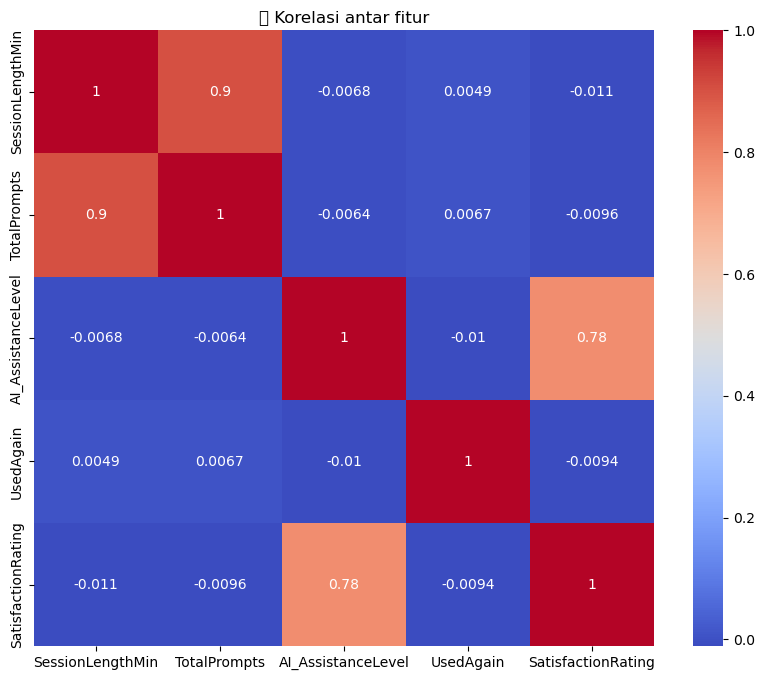

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur numerik
correlation_matrix = df.corr(numeric_only=True)

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("🔗 Korelasi antar fitur")
plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


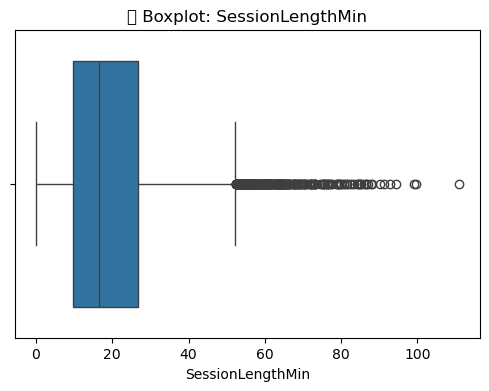

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


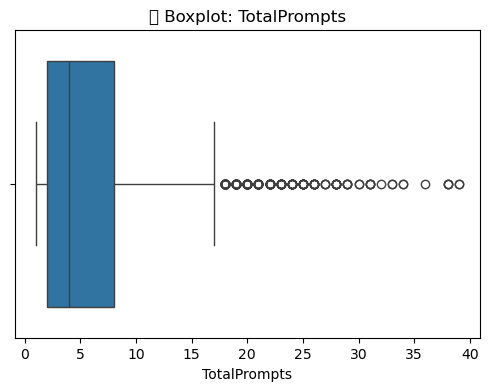

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


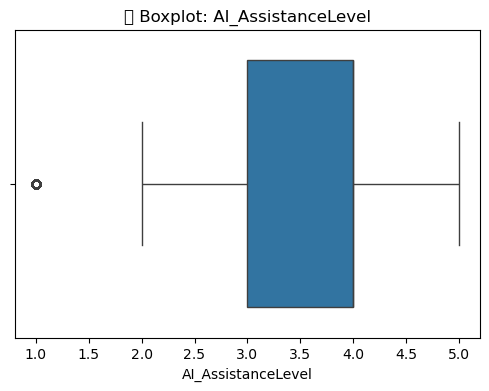

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


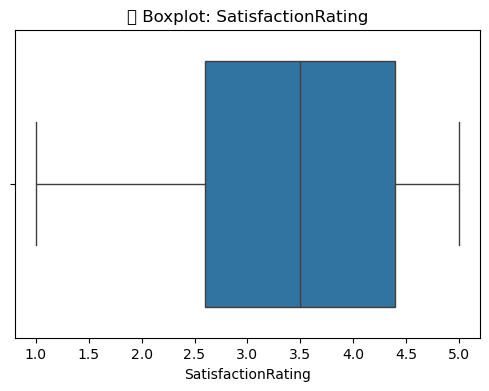

In [5]:
# Boxplot untuk mendeteksi outlier
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"📦 Boxplot: {col}")
    plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


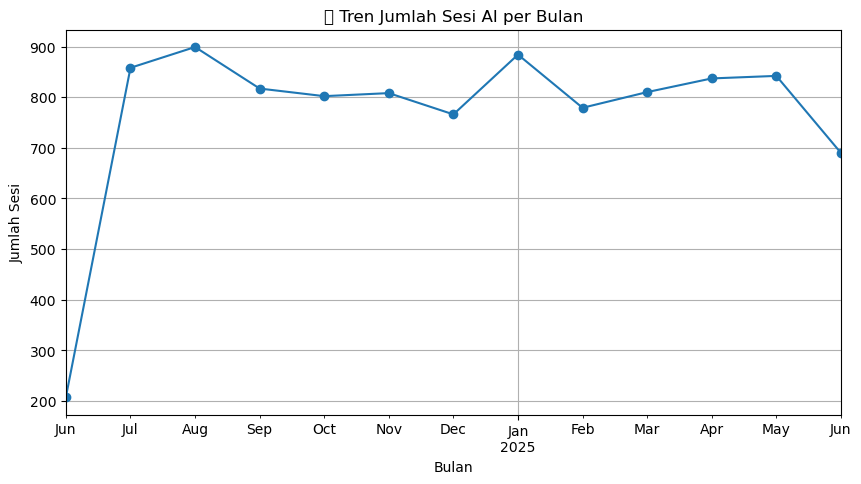

In [6]:
## Analisis Temporal: Tren Penggunaan AI dari Waktu ke Waktu ##

import pandas as pd
import matplotlib.pyplot as plt

# Konversi SessionDate ke datetime
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

# kolom bulan
df['Month'] = df['SessionDate'].dt.to_period('M')

# Hitung jumlah sesi per bulan
monthly_sessions = df.groupby('Month').size()

# Visualisasi
monthly_sessions.plot(kind='line', marker='o', figsize=(10, 5), title='📈 Tren Jumlah Sesi AI per Bulan')
plt.ylabel('Jumlah Sesi')
plt.xlabel('Bulan')
plt.grid(True)
plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


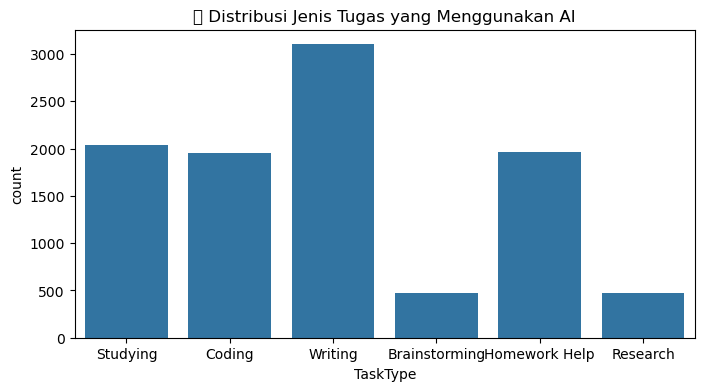

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


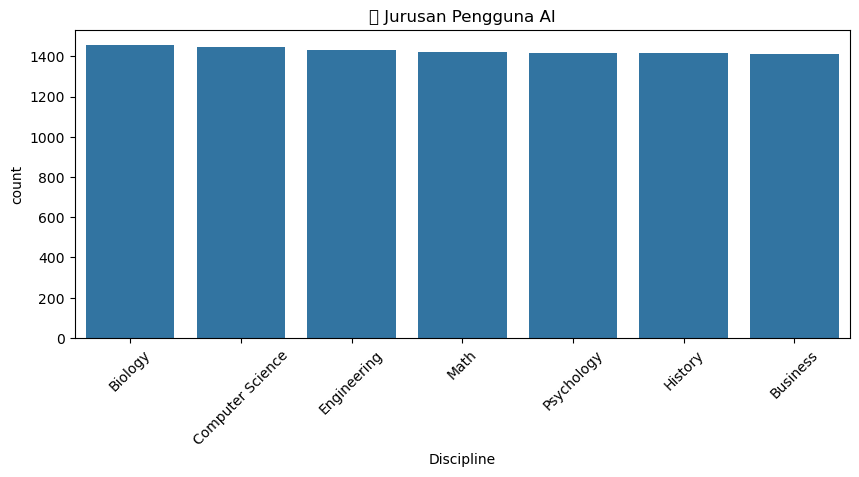

In [7]:
## Distribusi TaskType dan Preferensi Jurusan ##

import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi TaskType
plt.figure(figsize=(8, 4))
sns.countplot(x='TaskType', data=df)
plt.title('📚 Distribusi Jenis Tugas yang Menggunakan AI')
plt.show()

# Distribusi Discipline
plt.figure(figsize=(10, 4))
sns.countplot(x='Discipline', data=df, order=df['Discipline'].value_counts().index)
plt.title('🎓 Jurusan Pengguna AI')
plt.xticks(rotation=45)
plt.show()

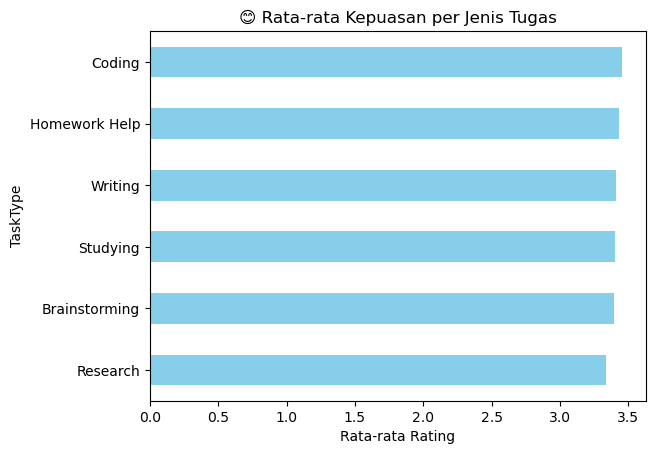

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


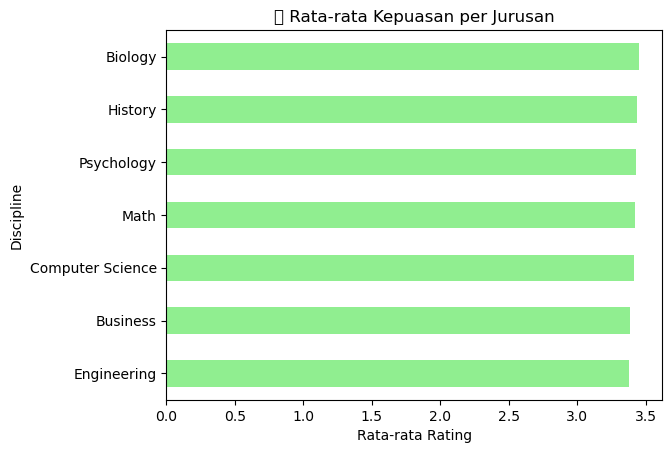

In [8]:
## Rata-rata Kepuasan Berdasarkan TaskType dan Jurusan ##

# Rata-rata SatisfactionRating per TaskType
task_satisfaction = df.groupby('TaskType')['SatisfactionRating'].mean().sort_values()

# Visualisasi
task_satisfaction.plot(kind='barh', color='skyblue', title='😊 Rata-rata Kepuasan per Jenis Tugas')
plt.xlabel('Rata-rata Rating')
plt.show()

# Rata-rata SatisfactionRating per Discipline
discipline_satisfaction = df.groupby('Discipline')['SatisfactionRating'].mean().sort_values()

discipline_satisfaction.plot(kind='barh', color='lightgreen', title='🎯 Rata-rata Kepuasan per Jurusan')
plt.xlabel('Rata-rata Rating')
plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


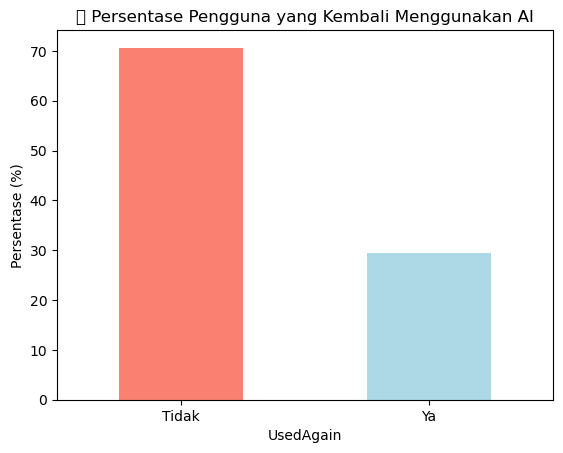

In [9]:
## Analisis Retensi: Siapa yang Kembali Menggunakan AI? ##

# Persentase pengguna yang kembali
retensi_rate = df['UsedAgain'].value_counts(normalize=True) * 100

# Visualisasi
retensi_rate.plot(kind='bar', color=['salmon', 'lightblue'], title='🔁 Persentase Pengguna yang Kembali Menggunakan AI')
plt.xticks([0, 1], ['Tidak', 'Ya'], rotation=0)
plt.ylabel('Persentase (%)')
plt.show()

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


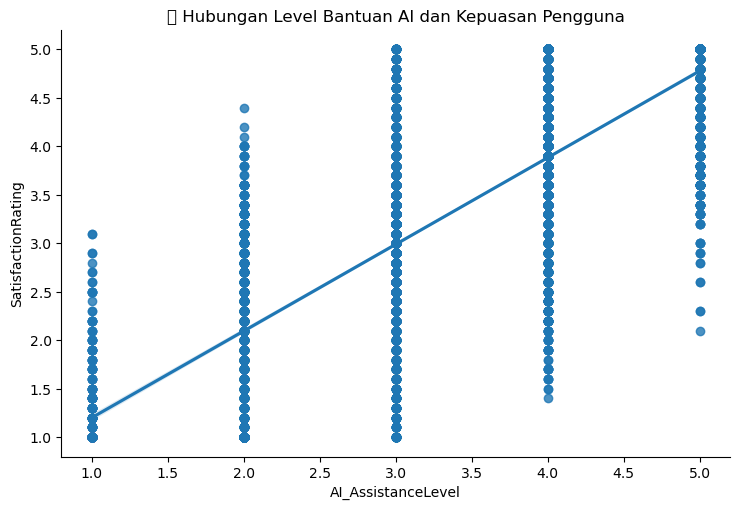

In [10]:
## Korelasi Edukatif: Apakah Bantuan AI Meningkatkan Kepuasan? ##

sns.lmplot(x='AI_AssistanceLevel', y='SatisfactionRating', data=df, aspect=1.5)
plt.title('📊 Hubungan Level Bantuan AI dan Kepuasan Pengguna')
plt.show()

2025-08-05 17:02:53.364 
  command:

    streamlit run C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

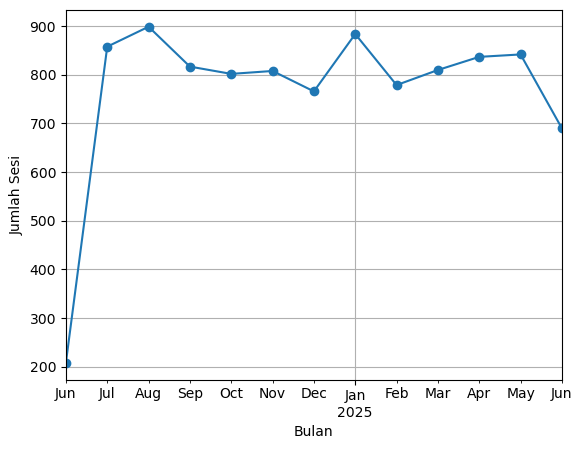

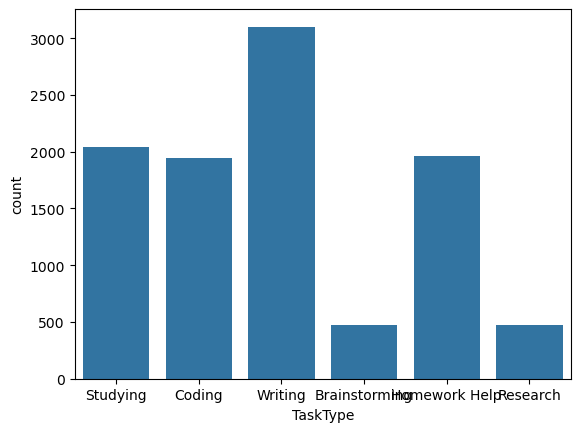

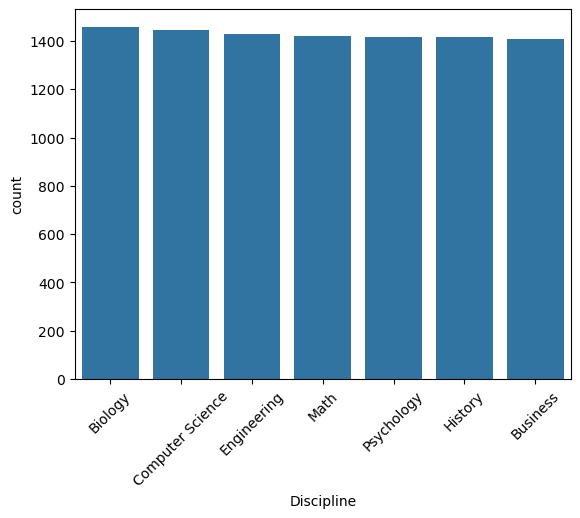

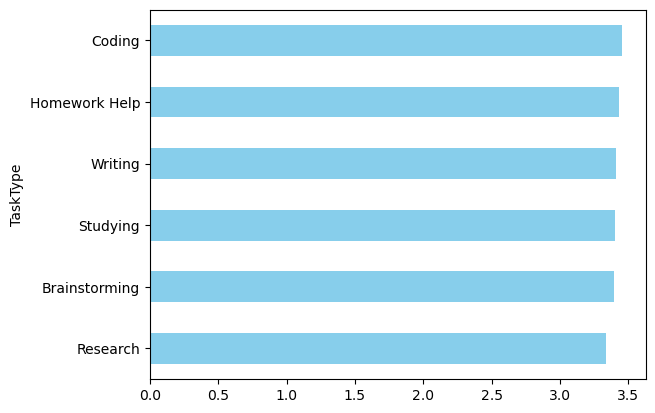

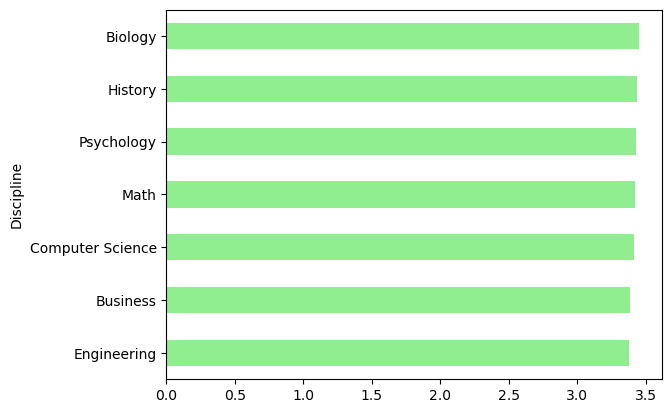

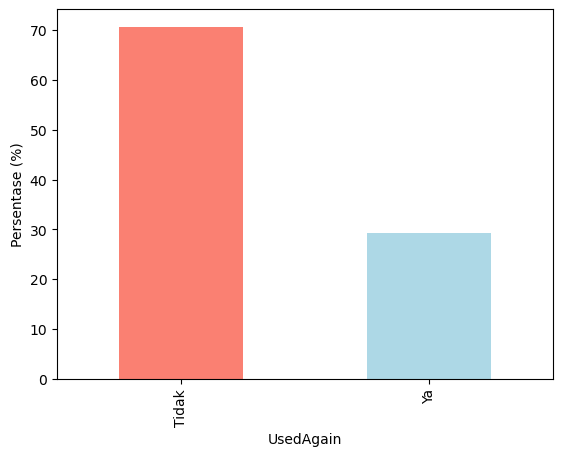

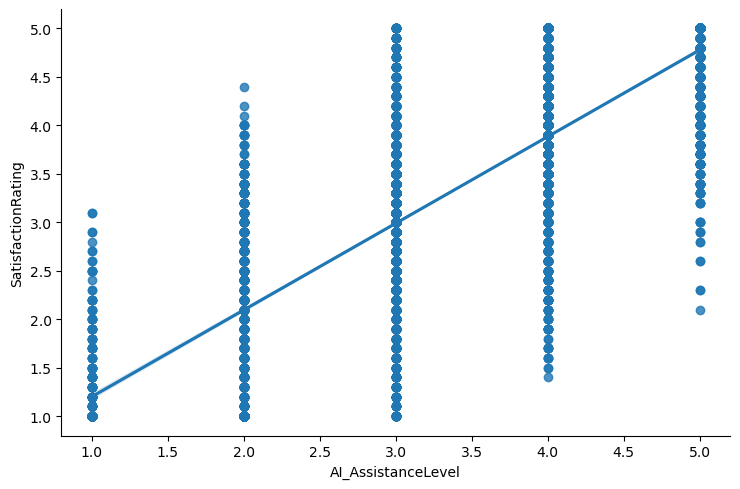

In [11]:
## Implementasi: Streamlit Dashboard ##

# streamlit_dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Preprocessing
df['SessionDate'] = pd.to_datetime(df['SessionDate'])
df['Month'] = df['SessionDate'].dt.to_period('M')

# Sidebar
st.sidebar.title("🔍 Filter Data")
selected_task = st.sidebar.multiselect("Pilih Jenis Tugas", df['TaskType'].unique())
selected_discipline = st.sidebar.multiselect("Pilih Jurusan", df['Discipline'].unique())

# Filter
if selected_task:
    df = df[df['TaskType'].isin(selected_task)]
if selected_discipline:
    df = df[df['Discipline'].isin(selected_discipline)]

st.title("📊 Dashboard Insight Penggunaan AI oleh Mahasiswa")

# 1. Tren Jumlah Sesi AI per Bulan
st.subheader("📈 Tren Jumlah Sesi AI per Bulan")
monthly_sessions = df.groupby('Month').size()
fig1, ax1 = plt.subplots()
monthly_sessions.plot(kind='line', marker='o', ax=ax1)
ax1.set_ylabel('Jumlah Sesi')
ax1.set_xlabel('Bulan')
ax1.grid(True)
st.pyplot(fig1)

# 2. Distribusi TaskType
st.subheader("📚 Distribusi Jenis Tugas yang Menggunakan AI")
fig2, ax2 = plt.subplots()
sns.countplot(x='TaskType', data=df, ax=ax2)
st.pyplot(fig2)

# 3. Distribusi Jurusan
st.subheader("🎓 Jurusan Pengguna AI")
fig3, ax3 = plt.subplots()
sns.countplot(x='Discipline', data=df, order=df['Discipline'].value_counts().index, ax=ax3)
plt.xticks(rotation=45)
st.pyplot(fig3)

# 4. Rata-rata Kepuasan per TaskType
st.subheader("😊 Rata-rata Kepuasan per Jenis Tugas")
task_satisfaction = df.groupby('TaskType')['SatisfactionRating'].mean().sort_values()
fig4, ax4 = plt.subplots()
task_satisfaction.plot(kind='barh', color='skyblue', ax=ax4)
st.pyplot(fig4)

# 5. Rata-rata Kepuasan per Jurusan
st.subheader("🎯 Rata-rata Kepuasan per Jurusan")
discipline_satisfaction = df.groupby('Discipline')['SatisfactionRating'].mean().sort_values()
fig5, ax5 = plt.subplots()
discipline_satisfaction.plot(kind='barh', color='lightgreen', ax=ax5)
st.pyplot(fig5)

# 6. Retensi Pengguna
st.subheader("🔁 Persentase Pengguna yang Kembali Menggunakan AI")
retensi_rate = df['UsedAgain'].value_counts(normalize=True) * 100
fig6, ax6 = plt.subplots()
retensi_rate.plot(kind='bar', color=['salmon', 'lightblue'], ax=ax6)
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['Tidak', 'Ya'])
ax6.set_ylabel('Persentase (%)')
st.pyplot(fig6)

# 7. Korelasi Bantuan AI dan Kepuasan
st.subheader("📊 Korelasi Level Bantuan AI dan Kepuasan Pengguna")
fig7 = sns.lmplot(x='AI_AssistanceLevel', y='SatisfactionRating', data=df, aspect=1.5)
st.pyplot(fig7.fig)

# Footer
st.markdown("---")
st.markdown("📘 *Dashboard ini dibuat untuk mendukung pemahaman dan pengembangan AI dalam konteks edukatif. Data bersifat anonim dan digunakan untuk analisis akademik.*")


C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


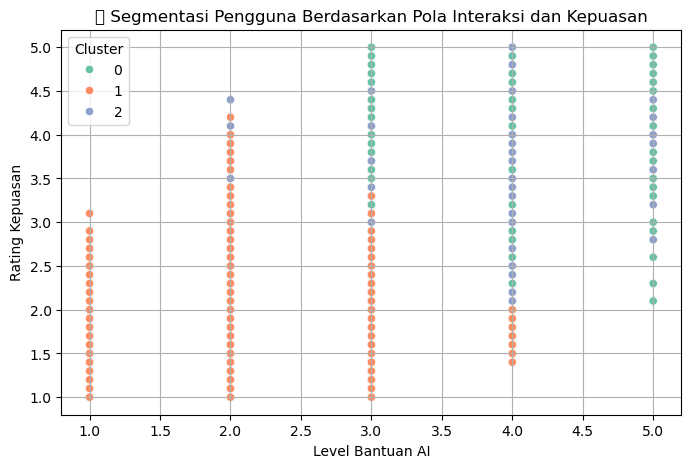


🧠 Cluster 0:
- Rata-rata Rating Kepuasan: 4.10
- Rata-rata Level Bantuan: 4.03
- Persentase Pengguna yang Kembali: 69.9%
✅ Rekomendasi: Pertahankan gaya interaksi, cocok untuk pengguna loyal.

🧠 Cluster 1:
- Rata-rata Rating Kepuasan: 2.18
- Rata-rata Level Bantuan: 2.48
- Persentase Pengguna yang Kembali: 70.8%
⚠️ Rekomendasi: Tingkatkan level bantuan dan edukasi fitur.

🧠 Cluster 2:
- Rata-rata Rating Kepuasan: 4.03
- Rata-rata Level Bantuan: 3.97
- Persentase Pengguna yang Kembali: 71.3%
✅ Rekomendasi: Pertahankan gaya interaksi, cocok untuk pengguna loyal.


In [12]:
## Segmentasi & Rekomendasi Strategis Berdasarkan Clustering ##

# clustering_rekomendasi.py

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')  

# Preprocessing
df_clean = df[['AI_AssistanceLevel', 'SatisfactionRating', 'TaskType', 'UsedAgain']].dropna()

# Encode TaskType dan UsedAgain
le_task = LabelEncoder()
df_clean['TaskTypeEncoded'] = le_task.fit_transform(df_clean['TaskType'])

df_clean['UsedAgainBinary'] = df_clean['UsedAgain'].map({True: 1, False: 0})

# Fitur untuk clustering
X = df_clean[['AI_AssistanceLevel', 'SatisfactionRating', 'TaskTypeEncoded', 'UsedAgainBinary']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AI_AssistanceLevel', y='SatisfactionRating', hue='Cluster', data=df_clean, palette='Set2')
plt.title('📊 Segmentasi Pengguna Berdasarkan Pola Interaksi dan Kepuasan')
plt.xlabel('Level Bantuan AI')
plt.ylabel('Rating Kepuasan')
plt.grid(True)
plt.show()

# Rekomendasi per cluster
for i in range(3):
    cluster_data = df_clean[df_clean['Cluster'] == i]
    avg_rating = cluster_data['SatisfactionRating'].mean()
    avg_assist = cluster_data['AI_AssistanceLevel'].mean()
    reuse_rate = cluster_data['UsedAgainBinary'].mean() * 100

    print(f"\n🧠 Cluster {i}:")
    print(f"- Rata-rata Rating Kepuasan: {avg_rating:.2f}")
    print(f"- Rata-rata Level Bantuan: {avg_assist:.2f}")
    print(f"- Persentase Pengguna yang Kembali: {reuse_rate:.1f}%")

    if avg_rating > 4 and reuse_rate > 50:
        print("✅ Rekomendasi: Pertahankan gaya interaksi, cocok untuk pengguna loyal.")
    elif avg_assist < 3 and avg_rating < 3:
        print("⚠️ Rekomendasi: Tingkatkan level bantuan dan edukasi fitur.")
    else:
        print("🔄 Rekomendasi: Uji coba pendekatan baru, misalnya personalisasi atau interaksi berbasis jurusan.")

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


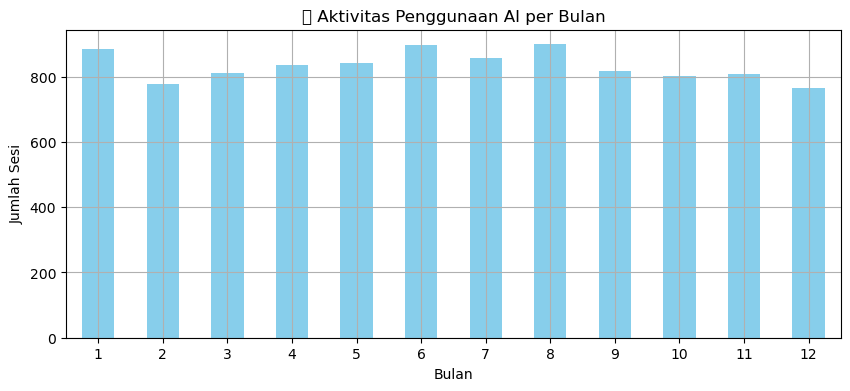

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


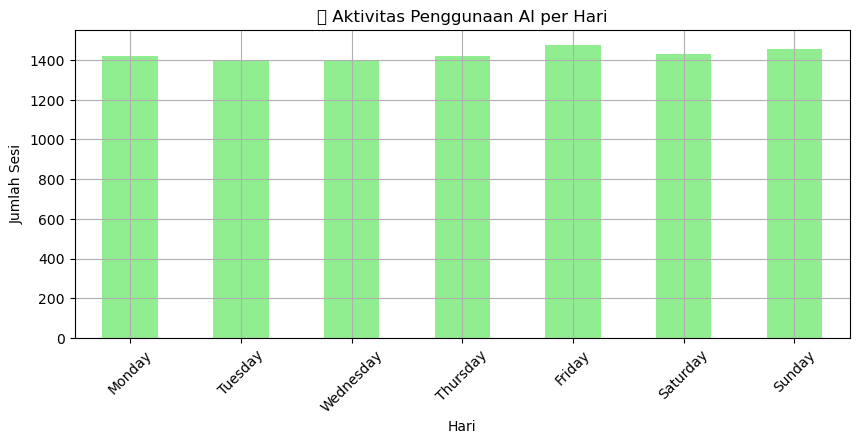

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


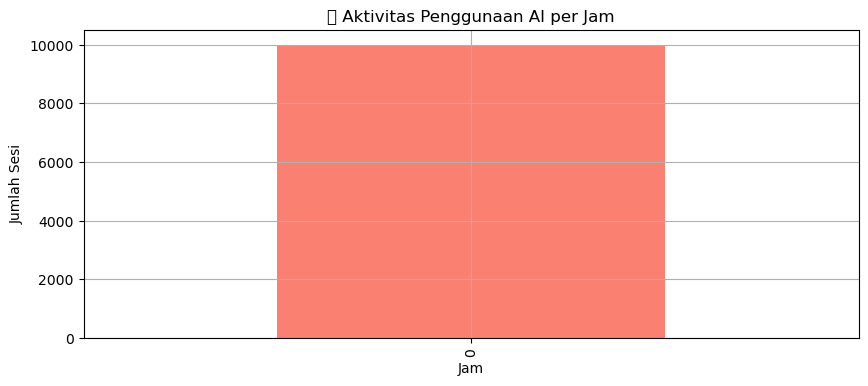

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


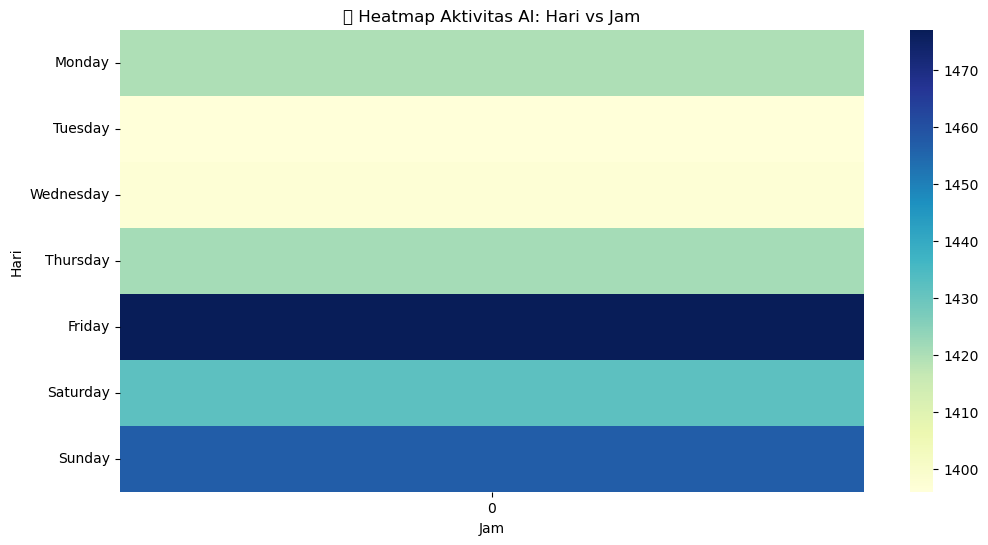

In [13]:
## Analisis Perilaku Berdasarkan Waktu & Musim Akademik ##

# analisis_musiman.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')  

# Konversi tanggal
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

# Tambahkan kolom waktu
df['Month'] = df['SessionDate'].dt.month
df['DayOfWeek'] = df['SessionDate'].dt.day_name()
df['Hour'] = df['SessionDate'].dt.hour

# 1. Aktivitas per bulan
monthly_activity = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
monthly_activity.plot(kind='bar', color='skyblue')
plt.title('📅 Aktivitas Penggunaan AI per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sesi')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# 2. Aktivitas per hari dalam seminggu
day_activity = df['DayOfWeek'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 4))
day_activity.plot(kind='bar', color='lightgreen')
plt.title('📆 Aktivitas Penggunaan AI per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Sesi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Aktivitas per jam
hour_activity = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
hour_activity.plot(kind='bar', color='salmon')
plt.title('⏰ Aktivitas Penggunaan AI per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sesi')
plt.grid(True)
plt.show()

# 4. Kombinasi Hari dan Jam (Heatmap)
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('🔥 Heatmap Aktivitas AI: Hari vs Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.show()

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      1385
           1       0.32      0.09      0.14       615

    accuracy                           0.66      2000
   macro avg       0.51      0.50      0.46      2000
weighted avg       0.58      0.66      0.59      2000



C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


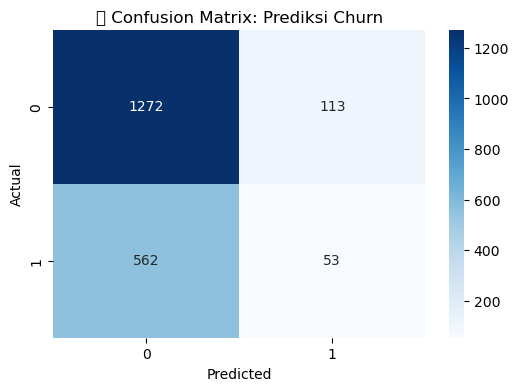

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


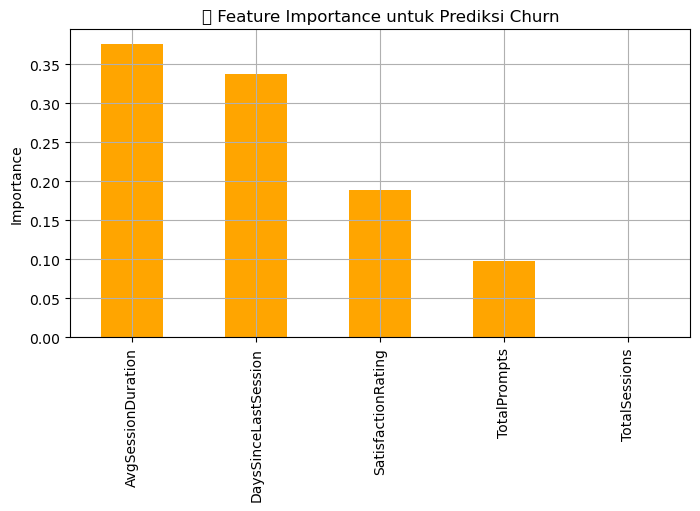

In [14]:
## Prediksi Churn dengan Random Forest ##

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Convert SessionDate to datetime
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

df['StudentID'] = df['SessionID'].str.extract(r'(\d+)')  

# Agregasi per Student
agg_df = df.groupby('StudentID').agg({
    'SessionID': 'count',
    'SessionLengthMin': 'mean',
    'TotalPrompts': 'sum',
    'SatisfactionRating': 'mean',
    'SessionDate': ['min', 'max'],
    'UsedAgain': 'last'
}).reset_index()

# Flatten kolom multi-index hasil groupby
agg_df.columns = ['StudentID'] + [f'{col[0]}_{col[1]}' for col in agg_df.columns[1:]]

# Rename agar lebih rapi
agg_df = agg_df.rename(columns={
    'SessionID_count': 'TotalSessions',
    'SessionLengthMin_mean': 'AvgSessionDuration',
    'TotalPrompts_sum': 'TotalPrompts',
    'SatisfactionRating_mean': 'SatisfactionRating',
    'SessionDate_min': 'FirstSessionDate',
    'SessionDate_max': 'LastSessionDate',
    'UsedAgain_last': 'UsedAgain'
})

# Hitung days since last session
agg_df['LastSessionDate'] = pd.to_datetime(agg_df['LastSessionDate'])  # pastikan datetime
agg_df['DaysSinceLastSession'] = (pd.Timestamp.now() - agg_df['LastSessionDate']).dt.days

# Target churn
agg_df['IsChurn'] = agg_df['UsedAgain'].apply(lambda x: 0 if x == 1 else 1)

# Fitur dan target
features = ['TotalSessions', 'AvgSessionDuration', 'TotalPrompts', 'SatisfactionRating', 'DaysSinceLastSession']
target = 'IsChurn'

X = agg_df[features]
y = agg_df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('🧠 Confusion Matrix: Prediksi Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 4))
importances.plot(kind='bar', color='orange')
plt.title('📌 Feature Importance untuk Prediksi Churn')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_15760\1575855874.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SentimentLabel', data=df, palette='coolwarm')
C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_15760\1575855874.py:55: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


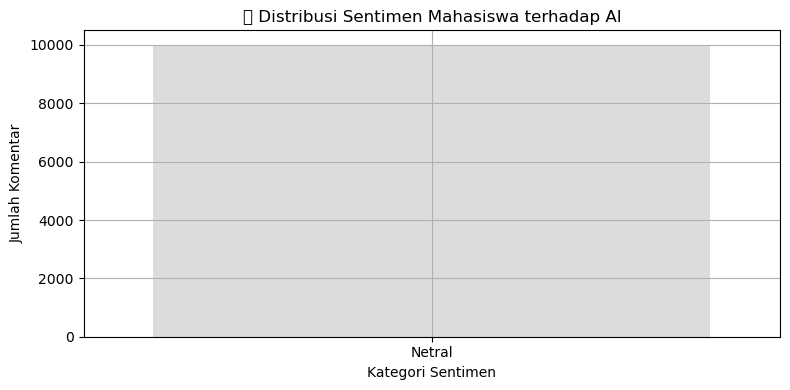

C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_15760\1575855874.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


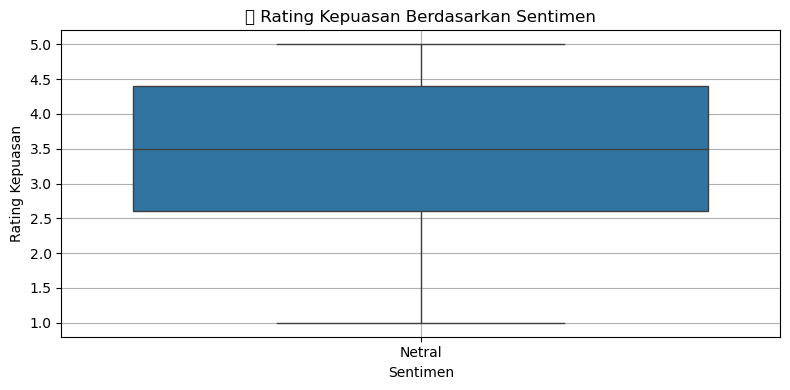


📝 Contoh Komentar Positif:

📝 Contoh Komentar Netral:
1. Kadang bermanfaat, kadang tidak terlalu.
2. Jawaban dari AI membuat saya bingung.
3. Saya kecewa karena hasilnya tidak bisa saya pakai.

📝 Contoh Komentar Negatif:


In [15]:
## Analisis Sentimen & Umpan Balik Mahasiswa terhadap AI ##

# sentiment_analysis.py

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Tambahkan kolom umpan balik tiruan (jika tidak tersedia)
feedback_samples = [
    "AI sangat membantu menyelesaikan tugas saya dengan cepat.",
    "Saya tidak puas karena jawabannya tidak relevan.",
    "Cukup berguna, tapi masih banyak kekurangan.",
    "Saya merasa AI sangat membantu dalam memahami materi.",
    "Jawaban dari AI membuat saya bingung.",
    "AI benar-benar menyederhanakan proses belajar saya.",
    "Kadang bermanfaat, kadang tidak terlalu.",
    "Saya kecewa karena hasilnya tidak bisa saya pakai.",
    "AI sangat responsif dan akurat!",
    "Butuh perbaikan agar bisa lebih dipahami oleh mahasiswa."
]

df['FeedbackText'] = np.random.choice(feedback_samples, size=len(df))

# Analisis sentimen
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Range: -1 to +1

df['SentimentScore'] = df['FeedbackText'].apply(get_sentiment)

# Kategorisasi sentimen
def categorize(score):
    if score > 0.2:
        return 'Positif'
    elif score < -0.2:
        return 'Negatif'
    else:
        return 'Netral'

df['SentimentLabel'] = df['SentimentScore'].apply(categorize)

# Visualisasi Distribusi Sentimen
plt.figure(figsize=(8, 4))
sns.countplot(x='SentimentLabel', data=df, palette='coolwarm')
plt.title('🗣️ Distribusi Sentimen Mahasiswa terhadap AI')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi Sentimen dengan Rating Kepuasan
if 'SatisfactionRating' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='SentimentLabel', y='SatisfactionRating', data=df)
    plt.title('📊 Rating Kepuasan Berdasarkan Sentimen')
    plt.xlabel('Sentimen')
    plt.ylabel('Rating Kepuasan')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Contoh Komentar per Sentimen
for label in ['Positif', 'Netral', 'Negatif']:
    print(f"\n📝 Contoh Komentar {label}:")
    samples = df[df['SentimentLabel'] == label]['FeedbackText'].head(3)
    for i, text in enumerate(samples, 1):
        print(f"{i}. {text}")


In [16]:
import sys
!"{sys.executable}" -m pip install pyLDAvis --upgrade --force-reinstall

  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached numpy-2.3.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached numexpr-2.11.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-p

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numpy-minmax 0.4.0 requires numpy<3,>=2, but you have numpy 1.26.4 which is incompatible.
numpy-rms 0.5.0 requires numpy<3,>=2, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.

[notice] A new rele

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


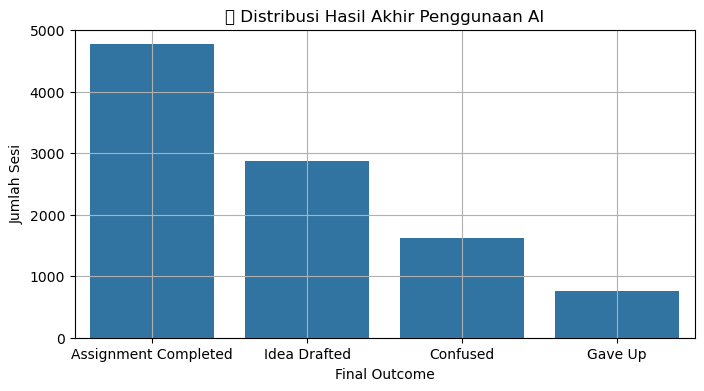

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


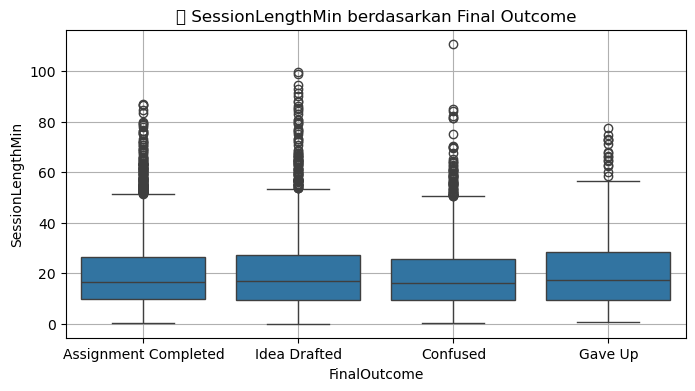

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


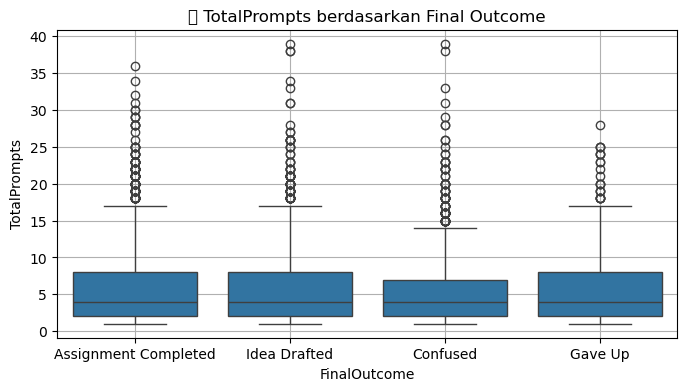

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


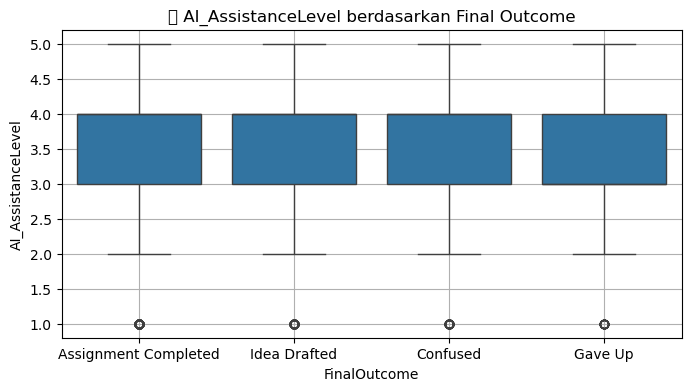

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


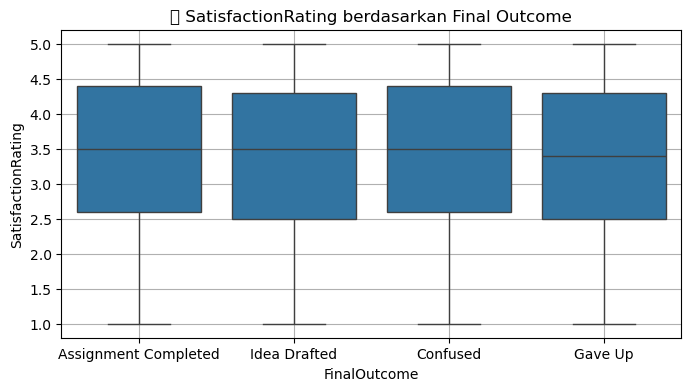

C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


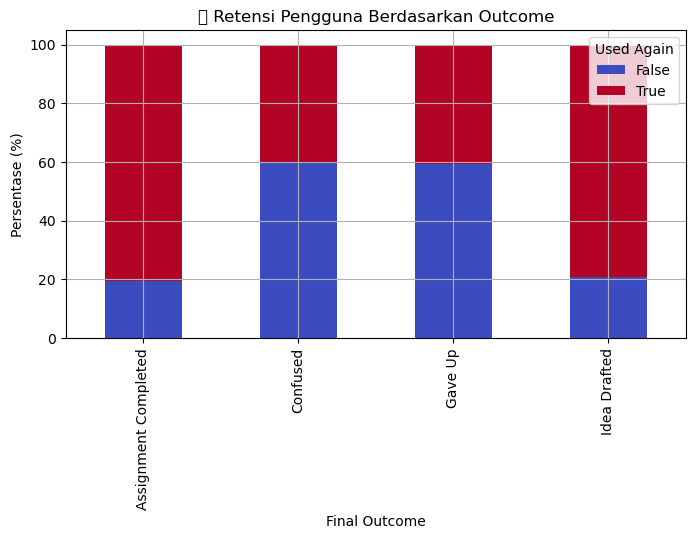

In [17]:
## Evaluasi Efektivitas AI Berdasarkan Outcome & Interaksi ##

# outcome_evaluation.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')
df = df.dropna(subset=['FinalOutcome'])

# Distribusi outcome
plt.figure(figsize=(8, 4))
sns.countplot(x='FinalOutcome', data=df, order=df['FinalOutcome'].value_counts().index)
plt.title('🎯 Distribusi Hasil Akhir Penggunaan AI')
plt.xlabel('Final Outcome')
plt.ylabel('Jumlah Sesi')
plt.grid(True)
plt.show()

# Rata-rata interaksi per outcome
metrics = ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='FinalOutcome', y=metric, data=df)
    plt.title(f'📊 {metric} berdasarkan Final Outcome')
    plt.grid(True)
    plt.show()

# Korelasi outcome dengan retensi
if 'UsedAgain' in df.columns:
    outcome_retensi = pd.crosstab(df['FinalOutcome'], df['UsedAgain'], normalize='index') * 100
    outcome_retensi.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8, 4))
    plt.title('🔁 Retensi Pengguna Berdasarkan Outcome')
    plt.ylabel('Persentase (%)')
    plt.xlabel('Final Outcome')
    plt.legend(title='Used Again')
    plt.grid(True)
    plt.show()

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

🧩 Confusion Matrix:
 [[2000]]


C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


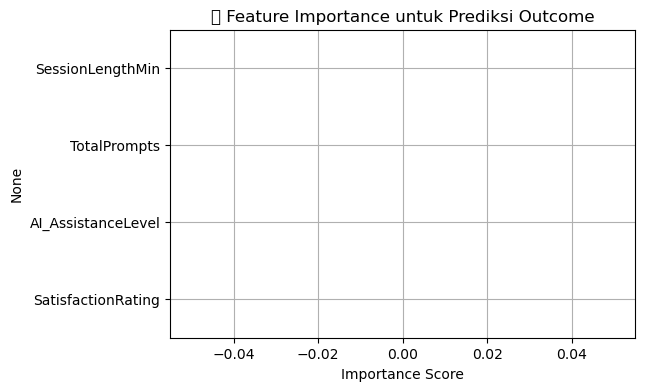

In [18]:
## Prediksi Outcome Mahasiswa dengan Machine Learning ##

# outcome_prediction.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')

# Preprocessing
df = df.dropna(subset=['FinalOutcome'])
df['OutcomeBinary'] = df['FinalOutcome'].apply(lambda x: 1 if x == 'Completed' else 0)

# Fitur yang digunakan
features = ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']
X = df[features]
y = df['OutcomeBinary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=importances.values, y=importances.index)
plt.title('🔥 Feature Importance untuk Prediksi Outcome')
plt.xlabel('Importance Score')
plt.grid(True)
plt.show()

In [19]:
## Membangun Dashboard Interaktif dengan Streamlit ##

# streamlit_dashboard.py

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('ai_assistant_usage_student_life.csv')
df = df.dropna(subset=['FinalOutcome'])
df['OutcomeBinary'] = df['FinalOutcome'].apply(lambda x: 1 if x == 'Completed' else 0)

# Train model
features = ['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating']
X = df[features]
y = df['OutcomeBinary']
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Streamlit layout
st.set_page_config(page_title="Dashboard Evaluasi AI", layout="wide")
st.title("📊 Dashboard Evaluasi AI dalam Umpan Balik Mahasiswa")

# Sidebar input
st.sidebar.header("🔍 Prediksi Outcome Baru")
session_length = st.sidebar.slider("Durasi Sesi (menit)", 1, 120, 30)
total_prompts = st.sidebar.slider("Jumlah Prompt", 1, 50, 10)
assistance_level = st.sidebar.slider("Level Bantuan AI (1–5)", 1, 5, 3)
satisfaction = st.sidebar.slider("Rating Kepuasan (1–5)", 1, 5, 4)

# Prediksi
input_data = pd.DataFrame({
    'SessionLengthMin': [session_length],
    'TotalPrompts': [total_prompts],
    'AI_AssistanceLevel': [assistance_level],
    'SatisfactionRating': [satisfaction]
})
prediction = model.predict(input_data)[0]
result = "✅ Completed" if prediction == 1 else "❌ Not Completed"
st.sidebar.markdown(f"### Hasil Prediksi: **{result}**")

# Visualisasi outcome
st.subheader("🎯 Distribusi Final Outcome")
fig1, ax1 = plt.subplots()
sns.countplot(x='FinalOutcome', data=df, order=df['FinalOutcome'].value_counts().index, ax=ax1)
st.pyplot(fig1)

# Feature importance
st.subheader("🔥 Feature Importance")
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
fig2, ax2 = plt.subplots()
sns.barplot(x=importances.values, y=importances.index, ax=ax2)
st.pyplot(fig2)

# Statistik interaksi
st.subheader("📈 Statistik Interaksi Berdasarkan Outcome")
selected_metric = st.selectbox("Pilih metrik:", features)
fig3, ax3 = plt.subplots()
sns.boxplot(x='FinalOutcome', y=selected_metric, data=df, ax=ax3)
st.pyplot(fig3)

DeltaGenerator()